In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [72]:
#lets start by applying the kmeans algorithm
data = pd.read_csv('Final_Train.csv')

In [73]:
# model can now be applied on data_train
data.groupby(['ExtraClaimDays','PotentialFraud'])['PotentialFraud'].count()
# Observation:
# ExtraClaimDays is a useful feature and can lead to fraudulent entries.

ExtraClaimDays  PotentialFraud
0.0             0                 345415
                1                 212779
1.0             1                      5
2.0             1                      4
3.0             1                      8
Name: PotentialFraud, dtype: int64

In [109]:
data["IP_OP_TotalReimbursementAmt"].value_counts()

 100      4310
 200      3982
 300      3312
 400      3065
 500      2938
          ... 
 57020       1
 36800       1
-8000        1
 44080       1
 48300       1
Name: IP_OP_TotalReimbursementAmt, Length: 5598, dtype: int64

In [89]:
data.groupby(['Inpatient_or_Outpatient','PotentialFraud'])['PotentialFraud'].count()

Inpatient_or_Outpatient  PotentialFraud
0                        0                 328343
                         1                 189394
1                        0                  17072
                         1                  23402
Name: PotentialFraud, dtype: int64

In [74]:
data['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [75]:
data.describe()

,Unnamed: 0,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt
count,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,279105.000000,997.012133,78.294788,0.483269,2.727940,0.000066,0.072507,0.196786,11.931472,11.93877,...,642.082447,777.149094,0.578838,0.421162,0.843831,0.099676,0.035318,0.021175,7506.196814,1218.455552
std,161141.779895,3821.534891,273.814128,2.300583,4.904984,0.012907,0.259325,0.397569,0.889712,0.78590,...,1119.655940,1275.060662,0.493746,0.493746,0.363015,0.299567,0.184583,0.143967,13051.813649,1648.740649
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8000.000000,0.000000
25%,139552.500000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,12.00000,...,49.000000,88.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,710.000000,210.000000
50%,279105.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,12.00000,...,218.000000,306.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2320.000000,730.000000
75%,418657.500000,300.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,12.00000,...,746.000000,934.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8420.000000,1550.000000
max,558210.000000,125000.000000,1068.000000,36.000000,37.000000,3.000000,1.000000,1.000000,12.000000,12.00000,...,7485.000000,8240.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,262720.000000,40694.000000


In [76]:
data.shape

(558211, 248)

In [77]:
data_train = data.drop(axis=1, columns = ['PotentialFraud','Provider'])

In [78]:
data_train = data_train.drop(axis=1,columns = ['Unnamed: 0'])

In [79]:
data_train.shape

(558211, 245)

In [80]:
data['ExtraClaimDays'].value_counts()
# this makes it an extremely important data feature in feature detection..

0.0    558194
3.0         8
1.0         5
2.0         4
Name: ExtraClaimDays, dtype: int64

In [81]:
data_train.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt
0,26000,1068.0,7.0,7,0.0,1,0,12,12,1,...,1,1,0,1,1,0,0,0,36060,3274
1,50,0.0,0.0,1,0.0,0,0,12,12,1,...,1,47,0,1,1,0,0,0,24450,2336
2,19000,1068.0,13.0,13,0.0,1,0,12,12,1,...,1,1,1,0,1,0,0,0,19100,1088
3,17000,1068.0,19.0,19,0.0,1,0,12,12,0,...,1,1,0,1,1,0,0,0,18050,1608
4,13000,1068.0,5.0,5,0.0,1,0,12,12,0,...,2,1,1,0,1,0,0,0,27450,2296


In [82]:
data_train.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'Hospitalization_Duration', 'Claim_Period', 'ExtraClaimDays',
       'Inpatient_or_Outpatient', 'RenalDiseaseIndicator',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       ...
       'PerProviderClmDiagnosisCode_6_count_ClaimID',
       'PerProviderDiagnosisGroupCode_count_ClaimID', 'Gender_0', 'Gender_1',
       'Race_1', 'Race_2', 'Race_3', 'Race_5', 'IP_OP_TotalReimbursementAmt',
       'IP_OP_AnnualDeductibleAmt'],
      dtype='object', length=245)

In [43]:
data_train.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt
0,26000,1068.0,7.0,7,0.0,1,0,12,12,1,...,1,1,0,1,1,0,0,0,36060,3274
1,50,0.0,0.0,1,0.0,0,0,12,12,1,...,1,47,0,1,1,0,0,0,24450,2336
2,19000,1068.0,13.0,13,0.0,1,0,12,12,1,...,1,1,1,0,1,0,0,0,19100,1088
3,17000,1068.0,19.0,19,0.0,1,0,12,12,0,...,1,1,0,1,1,0,0,0,18050,1608
4,13000,1068.0,5.0,5,0.0,1,0,12,12,0,...,2,1,1,0,1,0,0,0,27450,2296


In [29]:
# data_to_standardize = data_train
# scaler = StandardScaler().fit(data_to_standardize)

# # Standardize the columns.
# standardized_data = data_train.copy()
# standardized_columns = scaler.transform(data_to_standardize)
# standardized_data[int_cols] = standardized_columns


In [83]:
#applying kmeans over the whole dataset
scaler = StandardScaler().fit(data_train)
data_stand = scaler.transform(data_train)

In [84]:
data_stand.shape

(558211, 245)

In [87]:
#coding the elbow method for KMeans
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_stand)
    distortions.append(kmeanModel.inertia_)

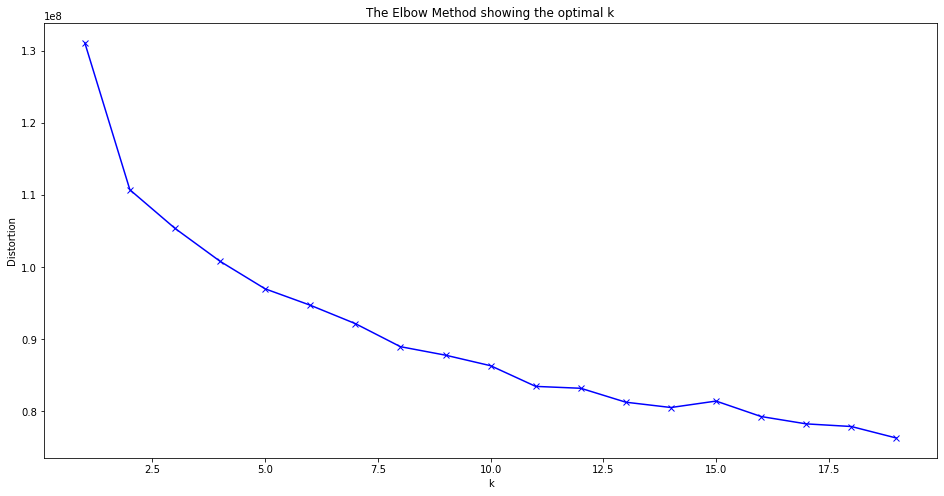

In [90]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [116]:
# so I am taking k to be 8
model = KMeans(n_clusters=8,n_jobs=-1).fit(data_stand)
data['kmeans_all_features_cluster'] = model.predict(data_stand)
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


,Unnamed: 0,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,...,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,kmeans_all_features_cluster,dbscan_labels
0,0,PRV55912,26000,1068.0,7.0,7,0.0,1,0,12,...,0,1,1,0,0,0,36060,3274,6,-1
1,1,PRV55912,50,0.0,0.0,1,0.0,0,0,12,...,0,1,1,0,0,0,24450,2336,7,-1
2,2,PRV55912,19000,1068.0,13.0,13,0.0,1,0,12,...,1,0,1,0,0,0,19100,1088,2,-1
3,3,PRV55912,17000,1068.0,19.0,19,0.0,1,0,12,...,0,1,1,0,0,0,18050,1608,5,-1
4,4,PRV55912,13000,1068.0,5.0,5,0.0,1,0,12,...,1,0,1,0,0,0,27450,2296,5,-1


In [117]:
# data[['kmeans_all_features_cluster','PotentialFraud']]
data.groupby(['kmeans_all_features_cluster','PotentialFraud'])['PotentialFraud'].count()

kmeans_all_features_cluster  PotentialFraud
0                            0                   7351
                             1                   4173
1                            0                 207315
                             1                 103102
2                            0                   2187
                             1                   3174
3                            0                      3
                             1                      6
4                            1                  25547
5                            0                   7311
                             1                  10109
6                            0                   7587
                             1                  10129
7                            0                 113661
                             1                  56556
Name: PotentialFraud, dtype: int64

In [93]:
data['kmeans_all_features_cluster'].value_counts()

4    477202
0     27899
3     17881
2     17404
5     12434
1      5278
6       104
7         9
Name: kmeans_all_features_cluster, dtype: int64

,Unnamed: 0,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,...,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,kmeans_all_features_cluster,dbscan_labels
558210,558210,PRV56377,60,0.0,0.0,1,0.0,0,0,12,...,1,0,1,0,0,0,3220,1270,4,-1


In [114]:
data[data['kmeans_all_features_cluster'] == 0].describe().to_excel('Cluster0.xlsx')

In [115]:
data[data['kmeans_all_features_cluster'] == 4].describe().to_excel('Cluster4.xlsx')

In [66]:
# 4th cluster has all the points that are fraudulent. --> Fetaure engineering is working 
# But now I will have to see what exactly are my features that are relevant here
data[data['kmeans_all_features_cluster'] == 4].describe()

,Unnamed: 0,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,PerProviderDiagnosisGroupCode_count_ClaimID,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,kmeans_all_features_cluster
count,27900.000000,27900.000000,27900.000000,27900.0,27900.000000,27900.0,27900.0,27900.000000,27900.000000,27900.000000,...,27900.000000,27900.000000,27900.000000,27900.000000,27900.000000,27900.000000,27900.000000,27900.000000,27900.000000,27900.0
mean,96759.326272,239.538351,2.812545,0.0,2.046882,0.0,0.0,0.167706,11.937097,11.950573,...,5149.047742,0.572903,0.427097,0.803584,0.080681,0.079498,0.036237,6019.170251,1045.155197,4.0
std,59907.014643,551.261471,15.343189,0.0,4.004597,0.0,0.0,0.373612,0.851971,0.697392,...,2063.786825,0.494665,0.494665,0.397294,0.272349,0.270520,0.186882,10884.550052,1469.876648,0.0
min,7160.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.000000,...,2271.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
25%,52399.750000,30.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,12.000000,12.000000,...,3433.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,630.000000,180.000000,4.0
50%,75585.500000,70.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,12.000000,12.000000,...,4444.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1850.000000,580.000000,4.0
75%,131032.250000,200.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,12.000000,12.000000,...,8240.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6410.000000,1398.000000,4.0
max,288945.000000,16400.000000,200.000000,0.0,21.000000,0.0,0.0,1.000000,12.000000,12.000000,...,8240.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,128010.000000,33428.000000,4.0


In [67]:
data['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [69]:
data[data['kmeans_all_features_cluster'] == 2].describe()

,Unnamed: 0,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,PerProviderDiagnosisGroupCode_count_ClaimID,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,kmeans_all_features_cluster
count,34844.000000,34844.000000,34844.000000,34844.000000,34844.000000,34844.000000,34844.000000,34844.000000,34844.000000,34844.000000,...,34844.000000,34844.000000,34844.000000,34844.000000,34844.000000,34844.000000,34844.000000,34844.000000,34844.000000,34844.0
mean,273601.421536,9039.236597,1040.412381,6.351710,6.370796,0.000804,0.995752,0.260877,11.914562,11.926501,...,3.418149,0.575020,0.424980,0.842555,0.104179,0.033521,0.019745,18369.836414,2419.917489,2.0
std,151912.818244,8797.053068,169.367915,5.235846,5.228601,0.043515,0.065035,0.439119,0.994642,0.854558,...,61.628392,0.494347,0.494347,0.364225,0.305497,0.179995,0.139125,17780.423848,2074.735777,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,2.0
25%,145923.500000,4000.000000,1068.000000,3.000000,3.000000,0.000000,1.000000,0.000000,12.000000,12.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7070.000000,1188.000000,2.0
50%,277643.500000,7000.000000,1068.000000,5.000000,5.000000,0.000000,1.000000,0.000000,12.000000,12.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12590.000000,2048.000000,2.0
75%,397988.250000,11000.000000,1068.000000,7.000000,8.000000,0.000000,1.000000,1.000000,12.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,22990.000000,2826.000000,2.0
max,555917.000000,125000.000000,1068.000000,36.000000,37.000000,3.000000,1.000000,1.000000,12.000000,12.000000,...,4739.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,262720.000000,40694.000000,2.0


In [70]:
data[data['kmeans_all_features_cluster'] == 5].describe()

,Unnamed: 0,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,PerProviderDiagnosisGroupCode_count_ClaimID,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,kmeans_all_features_cluster
count,477535.000000,477535.000000,477535.000000,477535.000000,477535.000000,477535.0,477535.000000,477535.000000,477535.000000,477535.000000,...,477535.000000,477535.000000,477535.000000,477535.000000,477535.000000,477535.000000,477535.000000,477535.000000,477535.000000,477535.0
mean,290209.599872,250.473662,3.478392,0.001960,2.070736,0.0,0.000655,0.173866,11.933039,11.938645,...,587.270259,0.579306,0.420694,0.847209,0.099390,0.032959,0.020442,5936.862555,1006.215754,5.0
std,159537.009042,549.578806,31.162451,0.086247,4.012004,0.0,0.025593,0.378994,0.879803,0.787023,...,643.502046,0.493671,0.493671,0.359786,0.299185,0.178529,0.141508,10686.616468,1285.446753,0.0
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8000.000000,0.000000,5.0
25%,156075.500000,40.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,12.000000,12.000000,...,112.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,630.000000,180.000000,5.0
50%,294654.000000,70.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,12.000000,12.000000,...,327.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1870.000000,580.000000,5.0
75%,428206.500000,200.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,12.000000,12.000000,...,840.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6110.000000,1380.000000,5.0
max,558210.000000,17300.000000,1068.000000,11.000000,22.000000,0.0,1.000000,1.000000,12.000000,12.000000,...,4739.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,174240.000000,40694.000000,5.0


In [97]:
# 2nd algorithm to apply is DBSCAN
from sklearn.cluster import DBSCAN

In [99]:
data_stand

array([[ 6.54266178,  3.61451801,  2.8326457 , ..., -0.14708113,
         2.18772881,  1.24673719],
       [-0.24780959, -0.28594163, -0.21006383, ..., -0.14708113,
         1.29819647,  0.67781761],
       [ 4.7109354 ,  3.61451801,  5.44068243, ..., -0.14708113,
         0.88829138, -0.07912443],
       ...,
       [ 0.28862457, -0.28594163, -0.21006383, ..., -0.14708113,
         0.515929  ,  0.96531002],
       [-0.25827659, -0.28594163, -0.21006383, ..., -0.14708113,
        -0.52607271, -0.5267392 ],
       [-0.24519283, -0.28594163, -0.21006383, ..., -0.14708113,
        -0.32839885,  0.03126295]])

In [100]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(data_stand)

DBSCAN(eps=0.05)

In [102]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [103]:
dbscan_labels = pd.Series(dbscan.labels_)

In [105]:
data["dbscan_labels"] = dbscan_labels

In [106]:
data.groupby(['dbscan_labels','PotentialFraud'])['PotentialFraud'].count()

dbscan_labels  PotentialFraud
-1             0                 345415
               1                 212796
Name: PotentialFraud, dtype: int64

In [144]:
drop_cols = ["PerClmDiagnosisCode_2_mean_DeductibleAmtPaid","PerClmDiagnosisCode_2_mean_Hospitalization_Duration",
"PerProvider_count_ClaimID","PerProviderBeneID_count_ClaimID",             
"PerProviderAttendingPhysician_count_ClaimID",
"PerProviderOtherPhysician_count_ClaimID",
"PerProviderOperatingPhysician_count_ClaimID",
"PerProviderClmAdmitDiagnosisCode_count_ClaimID",
"PerProviderClmProcedureCode_1_count_ClaimID",
"PerProviderClmProcedureCode_2_count_ClaimID",
"PerProviderClmProcedureCode_3_count_ClaimID",
"PerProviderClmProcedureCode_4_count_ClaimID",
"PerProviderClmProcedureCode_5_count_ClaimID",
"PerProviderClmDiagnosisCode_1_count_ClaimID",
"PerProviderClmDiagnosisCode_2_count_ClaimID",
"PerProviderClmDiagnosisCode_3_count_ClaimID",
"PerProviderClmDiagnosisCode_4_count_ClaimID",
"PerProviderClmDiagnosisCode_5_count_ClaimID",
"PerProviderClmDiagnosisCode_6_count_ClaimID",
"PerProviderDiagnosisGroupCode_count_ClaimID"]

In [145]:
data_new = data_train.drop(axis=1,columns = drop_cols)

In [146]:
data_new.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,PerClmDiagnosisCode_6_mean_Claim_Period,PerClmDiagnosisCode_6_mean_Patient_Risk_Score,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt
0,26000,1068.0,7.0,7,0.0,1,0,12,12,1,...,4.115888,5.639252,0,1,1,0,0,0,36060,3274
1,50,0.0,0.0,1,0.0,0,0,12,12,1,...,3.777120,5.254438,0,1,1,0,0,0,24450,2336
2,19000,1068.0,13.0,13,0.0,1,0,12,12,1,...,5.458333,6.208333,1,0,1,0,0,0,19100,1088
3,17000,1068.0,19.0,19,0.0,1,0,12,12,0,...,6.127660,5.234043,0,1,1,0,0,0,18050,1608
4,13000,1068.0,5.0,5,0.0,1,0,12,12,0,...,4.065724,5.368552,1,0,1,0,0,0,27450,2296


In [147]:
scaler = StandardScaler().fit(data_new)
data_stand_new = scaler.transform(data_new)

In [148]:
model = KMeans(n_clusters=8,n_jobs=-1).fit(data_stand_new)
data['kmeans_new_cluster'] = model.predict(data_stand_new)
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


,Unnamed: 0,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,...,Race_1,Race_2,Race_3,Race_5,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,kmeans_all_features_cluster,dbscan_labels,kmeans_new_cluster,kmeans_relevant_cluster
0,0,PRV55912,26000,1068.0,7.0,7,0.0,1,0,12,...,1,0,0,0,36060,3274,6,-1,4,0
1,1,PRV55912,50,0.0,0.0,1,0.0,0,0,12,...,1,0,0,0,24450,2336,7,-1,5,0
2,2,PRV55912,19000,1068.0,13.0,13,0.0,1,0,12,...,1,0,0,0,19100,1088,2,-1,7,0
3,3,PRV55912,17000,1068.0,19.0,19,0.0,1,0,12,...,1,0,0,0,18050,1608,5,-1,3,0
4,4,PRV55912,13000,1068.0,5.0,5,0.0,1,0,12,...,1,0,0,0,27450,2296,5,-1,3,0


In [149]:
# data[['kmeans_all_features_cluster','PotentialFraud']]
data.groupby(['kmeans_new_cluster','PotentialFraud'])['PotentialFraud'].count()

kmeans_new_cluster  PotentialFraud
0                   0                   7336
                    1                   4215
1                   0                 174045
                    1                  99789
2                   0                 110208
                    1                  64150
3                   0                   7328
                    1                  10112
4                   0                   7494
                    1                  10086
5                   0                  36816
                    1                  21264
6                   0                      3
                    1                      6
7                   0                   2185
                    1                   3174
Name: PotentialFraud, dtype: int64

In [150]:
# so basically drop cols are the features that have a little bit of juice in it
# Lets just apply Kmeans on these 16 features

data_relevant = data[drop_cols]

In [151]:
scaler = StandardScaler().fit(data_relevant)
data_stand_relevant = scaler.transform(data_relevant)

In [152]:
model = KMeans(n_clusters=8,n_jobs=-1).fit(data_stand_relevant)
data['kmeans_relevant_cluster'] = model.predict(data_stand_relevant)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [153]:
# data[['kmeans_all_features_cluster','PotentialFraud']]
data.groupby(['kmeans_relevant_cluster','PotentialFraud'])['PotentialFraud'].count()

kmeans_relevant_cluster  PotentialFraud
0                        0                  34504
                         1                  15569
1                        0                 254449
                         1                  58911
2                        1                  15820
3                        0                      5
                         1                  52912
4                        1                   3039
5                        0                  12261
                         1                   9298
6                        1                   4973
7                        0                  44196
                         1                  52274
Name: PotentialFraud, dtype: int64

In [154]:
# Observations:-
# So Cluster number 2,3,4,6 and even 2 are majorly fraudulent data
# no I will analyze these clusters but as so many clusters have all fraudulent data we will try to appy elbow method again to see that if we can reduce the numer of clusters
#coding the elbow method for KMeans

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k,n_jobs=-1)
    kmeanModel.fit(data_stand_relevant)
    distortions.append(kmeanModel.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramDa

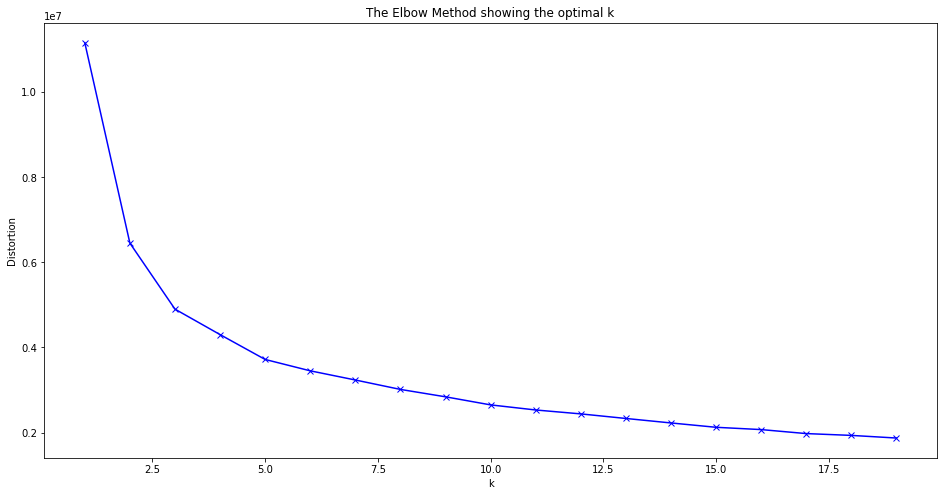

In [155]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [156]:
model = KMeans(n_clusters=4,n_jobs=-1).fit(data_stand_relevant)
data_relevant['kmeans_relevant_4clusters'] = model.predict(data_stand_relevant)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-156-e2d55a276873>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['kmeans_relevant_4clusters'] = model.predict(data_stand_relevant)


In [158]:
# data[['kmeans_all_features_cluster','PotentialFraud']]
data_relevant['PotentialFraud'] = data['PotentialFraud']
data_relevant.groupby(['kmeans_relevant_4clusters','PotentialFraud'])['PotentialFraud'].count()

<ipython-input-158-53e4667df97b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['PotentialFraud'] = data['PotentialFraud']


kmeans_relevant_4clusters  PotentialFraud
0                          0                 324335
                           1                  89625
1                          1                   7605
2                          1                  21310
3                          0                  21080
                           1                  94256
Name: PotentialFraud, dtype: int64

In [159]:
# S our objective is also fulfilled by using 4 clusters in this case, now we will analyze 
# how clusters 1 and 2 are different from 3 and 0
data_relevant[data_relevant['kmeans_relevant_4clusters'] == 1].describe()

,PerClmDiagnosisCode_2_mean_DeductibleAmtPaid,PerClmDiagnosisCode_2_mean_Hospitalization_Duration,PerProvider_count_ClaimID,PerProviderBeneID_count_ClaimID,PerProviderAttendingPhysician_count_ClaimID,PerProviderOtherPhysician_count_ClaimID,PerProviderOperatingPhysician_count_ClaimID,PerProviderClmAdmitDiagnosisCode_count_ClaimID,PerProviderClmProcedureCode_1_count_ClaimID,PerProviderClmProcedureCode_2_count_ClaimID,...,PerProviderClmProcedureCode_5_count_ClaimID,PerProviderClmDiagnosisCode_1_count_ClaimID,PerProviderClmDiagnosisCode_2_count_ClaimID,PerProviderClmDiagnosisCode_3_count_ClaimID,PerProviderClmDiagnosisCode_4_count_ClaimID,PerProviderClmDiagnosisCode_5_count_ClaimID,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID,kmeans_relevant_4clusters,PotentialFraud
count,7605.000000,7605.000000,7605.0,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.0,7605.0,...,7605.0,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.0,7605.0,7605.0
mean,59.463287,0.346902,8240.0,4.678501,1168.821433,3552.937804,5869.388297,5303.430769,8236.0,8239.0,...,8240.0,22.934254,1249.683235,3289.401315,5167.728600,6565.929652,7285.374622,8240.0,1.0,1.0
std,87.880880,0.611839,0.0,2.959194,75.883730,1915.797177,2287.591371,2573.304186,0.0,0.0,...,0.0,51.410299,1461.436312,2355.700141,2379.252017,1816.155663,1205.510933,0.0,0.0,0.0
min,0.000000,0.000000,8240.0,1.000000,33.000000,1041.000000,224.000000,1.000000,8236.0,8239.0,...,8240.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8240.0,1.0,1.0
25%,3.841590,0.008497,8240.0,2.000000,1156.000000,1098.000000,6799.000000,6555.000000,8236.0,8239.0,...,8240.0,2.000000,11.000000,37.000000,6267.000000,7069.000000,7485.000000,8240.0,1.0,1.0
50%,12.818699,0.051195,8240.0,4.000000,1158.000000,5031.000000,6799.000000,6555.000000,8236.0,8239.0,...,8240.0,5.000000,149.000000,4993.000000,6267.000000,7069.000000,7485.000000,8240.0,1.0,1.0
75%,107.483854,0.564373,8240.0,6.000000,1200.000000,5031.000000,6799.000000,6555.000000,8236.0,8239.0,...,8240.0,13.000000,3039.000000,4993.000000,6267.000000,7069.000000,7485.000000,8240.0,1.0,1.0
max,890.000000,9.461538,8240.0,16.000000,1223.000000,5031.000000,6799.000000,6555.000000,8236.0,8239.0,...,8240.0,220.000000,3039.000000,4993.000000,6267.000000,7069.000000,7485.000000,8240.0,1.0,1.0


In [160]:
data_relevant[data_relevant['kmeans_relevant_4clusters'] == 2].describe()

,PerClmDiagnosisCode_2_mean_DeductibleAmtPaid,PerClmDiagnosisCode_2_mean_Hospitalization_Duration,PerProvider_count_ClaimID,PerProviderBeneID_count_ClaimID,PerProviderAttendingPhysician_count_ClaimID,PerProviderOtherPhysician_count_ClaimID,PerProviderOperatingPhysician_count_ClaimID,PerProviderClmAdmitDiagnosisCode_count_ClaimID,PerProviderClmProcedureCode_1_count_ClaimID,PerProviderClmProcedureCode_2_count_ClaimID,...,PerProviderClmProcedureCode_5_count_ClaimID,PerProviderClmDiagnosisCode_1_count_ClaimID,PerProviderClmDiagnosisCode_2_count_ClaimID,PerProviderClmDiagnosisCode_3_count_ClaimID,PerProviderClmDiagnosisCode_4_count_ClaimID,PerProviderClmDiagnosisCode_5_count_ClaimID,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID,kmeans_relevant_4clusters,PotentialFraud
count,21310.000000,21310.000000,21310.000000,21310.000000,21310.000000,21310.000000,21310.000000,21310.000000,21310.000000,21310.000000,...,21310.000000,21310.000000,21310.000000,21310.000000,21310.000000,21310.000000,21310.000000,21310.000000,21310.0,21310.0
mean,57.338619,0.336548,4020.780009,3.920272,697.027264,1690.747583,2757.180854,2525.808916,4005.899578,4016.948053,...,4020.780009,11.356359,634.962881,1556.370436,2337.640732,2902.717034,3218.886861,4001.210418,2.0,1.0
std,87.317409,0.618465,992.727269,3.136017,771.275261,1071.053491,1284.653435,1418.473053,1001.133841,994.503388,...,992.727269,25.087381,708.423705,1122.541734,1223.945957,1172.124787,1136.515853,1007.576676,0.0,0.0
min,0.000000,0.000000,2275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0,1.0
25%,3.841590,0.008497,3436.000000,1.000000,93.000000,625.000000,2371.000000,2204.000000,3430.000000,3434.000000,...,3436.000000,1.000000,6.000000,25.000000,2127.000000,2763.000000,2930.000000,3433.000000,2.0,1.0
50%,9.933763,0.030109,3588.000000,3.000000,490.000000,2084.000000,2990.000000,2698.000000,3586.000000,3587.000000,...,3588.000000,2.000000,85.000000,1922.000000,2615.000000,3094.000000,3258.000000,3588.000000,2.0,1.0
75%,104.189573,0.564373,4739.000000,5.000000,1002.000000,2709.000000,3644.000000,3521.000000,4738.000000,4738.000000,...,4739.000000,6.000000,1337.000000,2683.000000,3349.000000,3774.000000,3995.000000,4739.000000,2.0,1.0
max,897.120000,11.000000,8240.000000,18.000000,2534.000000,5031.000000,6799.000000,6555.000000,8236.000000,8239.000000,...,8240.000000,220.000000,1798.000000,2908.000000,3620.000000,7069.000000,7485.000000,8240.000000,2.0,1.0


In [161]:
data_relevant[data_relevant['kmeans_relevant_4clusters'] == 0].describe()

,PerClmDiagnosisCode_2_mean_DeductibleAmtPaid,PerClmDiagnosisCode_2_mean_Hospitalization_Duration,PerProvider_count_ClaimID,PerProviderBeneID_count_ClaimID,PerProviderAttendingPhysician_count_ClaimID,PerProviderOtherPhysician_count_ClaimID,PerProviderOperatingPhysician_count_ClaimID,PerProviderClmAdmitDiagnosisCode_count_ClaimID,PerProviderClmProcedureCode_1_count_ClaimID,PerProviderClmProcedureCode_2_count_ClaimID,...,PerProviderClmProcedureCode_5_count_ClaimID,PerProviderClmDiagnosisCode_1_count_ClaimID,PerProviderClmDiagnosisCode_2_count_ClaimID,PerProviderClmDiagnosisCode_3_count_ClaimID,PerProviderClmDiagnosisCode_4_count_ClaimID,PerProviderClmDiagnosisCode_5_count_ClaimID,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID,kmeans_relevant_4clusters,PotentialFraud
count,413960.000000,413960.000000,413960.000000,413960.000000,413960.000000,413960.000000,413960.000000,413960.000000,413960.000000,413960.000000,...,413960.000000,413960.000000,413960.000000,413960.000000,413960.000000,413960.000000,413960.000000,413960.000000,413960.0,413960.000000
mean,84.737105,0.529680,298.389622,2.337173,54.948497,134.092569,185.141028,163.594814,272.521480,291.446867,...,298.378959,1.686315,34.607556,87.965190,138.812774,181.650343,207.511781,259.115473,0.0,0.216506
std,127.148039,1.013385,274.088078,2.345969,101.060553,167.255013,203.194200,197.980521,258.452399,268.916817,...,274.077912,2.293565,65.447765,128.042342,171.814117,203.098867,220.535761,255.333826,0.0,0.411864
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000
25%,3.841590,0.008497,87.000000,1.000000,4.000000,14.000000,26.000000,3.000000,69.000000,82.000000,...,87.000000,1.000000,1.000000,1.000000,2.000000,13.000000,30.000000,57.000000,0.0,0.000000
50%,28.521346,0.153846,211.000000,1.000000,16.000000,66.000000,106.000000,82.000000,187.000000,205.000000,...,211.000000,1.000000,3.000000,18.000000,64.000000,105.000000,126.000000,173.000000,0.0,0.000000
75%,119.023684,0.681159,458.000000,3.000000,59.000000,195.000000,299.000000,260.000000,429.000000,449.000000,...,458.000000,1.000000,31.000000,129.000000,218.000000,300.000000,334.000000,412.000000,0.0,0.000000
max,1068.000000,36.000000,3436.000000,28.000000,1053.000000,2084.000000,1799.000000,1406.000000,2158.000000,2841.000000,...,3436.000000,43.000000,390.000000,789.000000,1258.000000,1428.000000,1910.000000,1796.000000,0.0,1.000000


In [162]:
data_relevant[data_relevant['kmeans_relevant_4clusters'] == 3].describe()

,PerClmDiagnosisCode_2_mean_DeductibleAmtPaid,PerClmDiagnosisCode_2_mean_Hospitalization_Duration,PerProvider_count_ClaimID,PerProviderBeneID_count_ClaimID,PerProviderAttendingPhysician_count_ClaimID,PerProviderOtherPhysician_count_ClaimID,PerProviderOperatingPhysician_count_ClaimID,PerProviderClmAdmitDiagnosisCode_count_ClaimID,PerProviderClmProcedureCode_1_count_ClaimID,PerProviderClmProcedureCode_2_count_ClaimID,...,PerProviderClmProcedureCode_5_count_ClaimID,PerProviderClmDiagnosisCode_1_count_ClaimID,PerProviderClmDiagnosisCode_2_count_ClaimID,PerProviderClmDiagnosisCode_3_count_ClaimID,PerProviderClmDiagnosisCode_4_count_ClaimID,PerProviderClmDiagnosisCode_5_count_ClaimID,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID,kmeans_relevant_4clusters,PotentialFraud
count,115336.000000,115336.000000,115336.000000,115336.000000,115336.000000,115336.000000,115336.000000,115336.000000,115336.000000,115336.000000,...,115336.000000,115336.000000,115336.000000,115336.000000,115336.000000,115336.000000,115336.000000,115336.000000,115336.0,115336.00000
mean,60.285912,0.352793,1623.541990,3.649112,259.348157,706.463723,1092.214218,979.404098,1583.663011,1615.041652,...,1623.524355,5.032401,227.372988,577.000642,898.065296,1148.508601,1287.682554,1548.681574,3.0,0.81723
std,88.659608,0.617246,526.003785,3.055456,321.031894,496.365387,590.661857,616.064080,526.447121,523.980036,...,525.989536,10.134838,283.006950,483.392219,563.640661,576.528345,571.734315,543.729687,0.0,0.38648
min,0.000000,0.000000,562.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,562.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,0.00000
25%,3.841590,0.008497,1215.000000,1.000000,53.000000,170.000000,825.000000,711.000000,1188.000000,1208.000000,...,1215.000000,1.000000,3.000000,7.000000,640.000000,894.000000,973.000000,1168.000000,3.0,1.00000
50%,12.818699,0.051195,1592.000000,3.000000,119.000000,746.000000,1097.000000,1012.000000,1467.000000,1555.000000,...,1592.000000,2.000000,25.000000,643.000000,955.000000,1157.000000,1263.000000,1455.000000,3.0,1.00000
75%,107.483854,0.564373,1961.000000,5.000000,346.000000,1106.000000,1511.000000,1442.000000,1924.000000,1924.000000,...,1961.000000,3.000000,470.000000,924.000000,1346.000000,1604.000000,1705.000000,1924.000000,3.0,1.00000
max,1068.000000,18.000000,4739.000000,21.000000,2534.000000,2867.000000,2990.000000,3766.000000,4738.000000,4738.000000,...,4739.000000,100.000000,1080.000000,1922.000000,2723.000000,3094.000000,3258.000000,4739.000000,3.0,1.00000


In [164]:
# Now we will also confirm the above results by applying DBSCAN and then applying semi-supervised ML approaches on my data
data_relevant.describe()

,PerClmDiagnosisCode_2_mean_DeductibleAmtPaid,PerClmDiagnosisCode_2_mean_Hospitalization_Duration,PerProvider_count_ClaimID,PerProviderBeneID_count_ClaimID,PerProviderAttendingPhysician_count_ClaimID,PerProviderOtherPhysician_count_ClaimID,PerProviderOperatingPhysician_count_ClaimID,PerProviderClmAdmitDiagnosisCode_count_ClaimID,PerProviderClmProcedureCode_1_count_ClaimID,PerProviderClmProcedureCode_2_count_ClaimID,...,PerProviderClmProcedureCode_5_count_ClaimID,PerProviderClmDiagnosisCode_1_count_ClaimID,PerProviderClmDiagnosisCode_2_count_ClaimID,PerProviderClmDiagnosisCode_3_count_ClaimID,PerProviderClmDiagnosisCode_4_count_ClaimID,PerProviderClmDiagnosisCode_5_count_ClaimID,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID,kmeans_relevant_4clusters,PotentialFraud
count,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,...,558211.00000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,78.294788,0.483269,822.488681,2.700576,136.867953,358.358368,548.188447,492.358336,794.443049,815.423822,...,822.47713,3.036312,113.90914,288.681461,448.142181,572.276718,642.082447,777.149094,0.709827,0.381211
std,118.863956,0.930686,1275.484533,2.626579,293.629266,659.228988,983.833965,936.409268,1274.336732,1275.115910,...,1275.48266,9.765464,321.30965,644.367461,879.985535,1036.899278,1119.655940,1275.060662,1.233706,0.485685
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.841590,0.008497,122.000000,1.000000,6.000000,23.000000,40.000000,6.000000,102.000000,117.000000,...,122.00000,1.000000,1.00000,1.000000,3.000000,28.000000,49.000000,88.000000,0.000000,0.000000
50%,20.254528,0.108527,361.000000,2.000000,30.000000,107.000000,176.000000,138.000000,331.000000,354.000000,...,361.00000,1.000000,5.00000,36.000000,110.000000,179.000000,218.000000,306.000000,0.000000,0.000000
75%,119.023684,0.634775,1013.000000,3.000000,113.000000,394.000000,630.000000,560.000000,999.000000,1010.000000,...,1013.00000,2.000000,63.00000,286.000000,479.000000,669.000000,746.000000,934.000000,1.000000,1.000000
max,1068.000000,36.000000,8240.000000,28.000000,2534.000000,5031.000000,6799.000000,6555.000000,8236.000000,8239.000000,...,8240.00000,220.000000,3039.00000,4993.000000,6267.000000,7069.000000,7485.000000,8240.000000,3.000000,1.000000


In [166]:
k = 4
kmeans = KMeans(n_clusters=k,n_jobs=-1)
X_digits_dist = kmeans.fit_transform(data_stand_relevant)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = data_stand_relevant[representative_digit_idx]

data_relevant['kmeans_relevant_4clusters'] = kmeans.predict(data_stand_relevant)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-166-6e6a1c53dca5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['kmeans_relevant_4clusters'] = kmeans.predict(data_stand_relevant)


In [167]:
# data[['kmeans_all_features_cluster','PotentialFraud']]
data_relevant['PotentialFraud'] = data['PotentialFraud']
data_relevant.groupby(['kmeans_relevant_4clusters','PotentialFraud'])['PotentialFraud'].count()

<ipython-input-167-53e4667df97b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['PotentialFraud'] = data['PotentialFraud']


kmeans_relevant_4clusters  PotentialFraud
0                          0                 324329
                           1                  89622
1                          1                   7605
2                          1                  21311
3                          0                  21086
                           1                  94258
Name: PotentialFraud, dtype: int64

In [171]:
y_representative_digits = np.array([0,1,1,0])

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
# now we will apply Semi-Supervised ML approach
# X_train -> data_relevant
# 
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(data_stand_relevant)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = data_stand_relevant[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated

In [190]:
data_relevant.describe()

,PerClmDiagnosisCode_2_mean_DeductibleAmtPaid,PerClmDiagnosisCode_2_mean_Hospitalization_Duration,PerProvider_count_ClaimID,PerProviderBeneID_count_ClaimID,PerProviderAttendingPhysician_count_ClaimID,PerProviderOtherPhysician_count_ClaimID,PerProviderOperatingPhysician_count_ClaimID,PerProviderClmAdmitDiagnosisCode_count_ClaimID,PerProviderClmProcedureCode_1_count_ClaimID,PerProviderClmProcedureCode_2_count_ClaimID,...,PerProviderClmProcedureCode_5_count_ClaimID,PerProviderClmDiagnosisCode_1_count_ClaimID,PerProviderClmDiagnosisCode_2_count_ClaimID,PerProviderClmDiagnosisCode_3_count_ClaimID,PerProviderClmDiagnosisCode_4_count_ClaimID,PerProviderClmDiagnosisCode_5_count_ClaimID,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID,kmeans_relevant_4clusters,PotentialFraud
count,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,...,558211.00000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,78.294788,0.483269,822.488681,2.700576,136.867953,358.358368,548.188447,492.358336,794.443049,815.423822,...,822.47713,3.036312,113.90914,288.681461,448.142181,572.276718,642.082447,777.149094,0.709873,0.381211
std,118.863956,0.930686,1275.484533,2.626579,293.629266,659.228988,983.833965,936.409268,1274.336732,1275.115910,...,1275.48266,9.765464,321.30965,644.367461,879.985535,1036.899278,1119.655940,1275.060662,1.233734,0.485685
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.841590,0.008497,122.000000,1.000000,6.000000,23.000000,40.000000,6.000000,102.000000,117.000000,...,122.00000,1.000000,1.00000,1.000000,3.000000,28.000000,49.000000,88.000000,0.000000,0.000000
50%,20.254528,0.108527,361.000000,2.000000,30.000000,107.000000,176.000000,138.000000,331.000000,354.000000,...,361.00000,1.000000,5.00000,36.000000,110.000000,179.000000,218.000000,306.000000,0.000000,0.000000
75%,119.023684,0.634775,1013.000000,3.000000,113.000000,394.000000,630.000000,560.000000,999.000000,1010.000000,...,1013.00000,2.000000,63.00000,286.000000,479.000000,669.000000,746.000000,934.000000,1.000000,1.000000
max,1068.000000,36.000000,8240.000000,28.000000,2534.000000,5031.000000,6799.000000,6555.000000,8236.000000,8239.000000,...,8240.00000,220.000000,3039.00000,4993.000000,6267.000000,7069.000000,7485.000000,8240.000000,3.000000,1.000000


In [191]:
data_relevant.head()
labels = data_relevant["PotentialFraud"]
data_relevant_sup = data_relevant.drop(axis=1,columns = ["PotentialFraud","kmeans_relevant_4clusters"])

In [192]:
labels

0         1
1         1
2         1
3         1
4         1
         ..
558206    0
558207    0
558208    0
558209    0
558210    0
Name: PotentialFraud, Length: 558211, dtype: int64

In [193]:
data_relevant_sup

,PerClmDiagnosisCode_2_mean_DeductibleAmtPaid,PerClmDiagnosisCode_2_mean_Hospitalization_Duration,PerProvider_count_ClaimID,PerProviderBeneID_count_ClaimID,PerProviderAttendingPhysician_count_ClaimID,PerProviderOtherPhysician_count_ClaimID,PerProviderOperatingPhysician_count_ClaimID,PerProviderClmAdmitDiagnosisCode_count_ClaimID,PerProviderClmProcedureCode_1_count_ClaimID,PerProviderClmProcedureCode_2_count_ClaimID,PerProviderClmProcedureCode_3_count_ClaimID,PerProviderClmProcedureCode_4_count_ClaimID,PerProviderClmProcedureCode_5_count_ClaimID,PerProviderClmDiagnosisCode_1_count_ClaimID,PerProviderClmDiagnosisCode_2_count_ClaimID,PerProviderClmDiagnosisCode_3_count_ClaimID,PerProviderClmDiagnosisCode_4_count_ClaimID,PerProviderClmDiagnosisCode_5_count_ClaimID,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID
0,119.023684,0.634775,107,1,1,78,62,1,71,98,106,107,107,1,4,1,1,1,1,1
1,173.408430,0.919816,107,1,1,78,1,39,71,98,106,107,107,1,1,1,2,1,1,47
2,682.333333,5.488095,107,1,1,2,5,1,1,2,106,107,107,2,1,1,2,1,1,1
3,378.330211,2.398126,107,1,2,78,1,2,1,98,106,107,107,3,1,1,1,1,1,1
4,267.000000,1.250000,107,1,3,2,4,1,1,98,106,107,107,1,1,5,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,14.505980,0.053358,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
558207,3.841590,0.008497,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
558208,523.489362,3.042553,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
558209,3.841590,0.008497,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [198]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_relevant_sup,labels,test_size=0.25)

In [199]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train[:50],y_train[:50])

RandomForestClassifier()

In [200]:
y_pred = rf.predict(x_test)

In [206]:
from sklearn.metrics import roc_curve,auc,classification_report
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83     86324
           1       0.77      0.61      0.68     53229

    accuracy                           0.78    139553
   macro avg       0.78      0.75      0.76    139553
weighted avg       0.78      0.78      0.78    139553



In [216]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k,n_jobs=-1)
    kmeanModel.fit(x_train)
    distortions.append(kmeanModel.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramDa

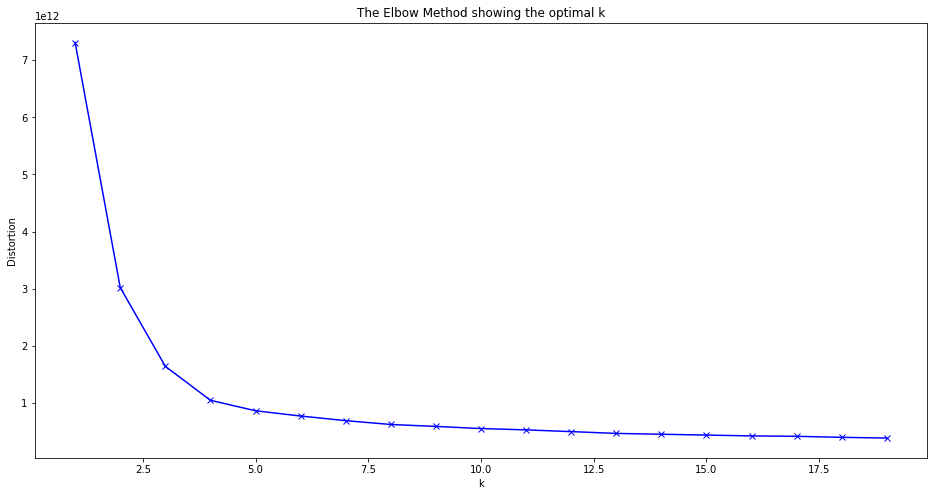

In [217]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [202]:
# now I will take random sampes of 25-25 trained 
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(x_train)
X_digits_dist
# representative_digit_idx = np.argmin(X_digits_dist, axis=0)
# X_representative_digits = X_train[representative_digit_idx]


array([[  723.44910999, 13822.12406023,  4877.87741172, ...,
          745.98657954,  8977.58838338, 10709.01593939],
       [  504.1296353 , 15000.16607759,  6022.33382708, ...,
         1479.18195736, 10140.60103315, 11757.93541126],
       [  922.859652  , 13774.62102945,  4747.57410974, ...,
          720.6254797 ,  8914.0079331 , 10580.08290245],
       ...,
       [ 6080.76259759,  9136.79943351,  1373.14561765, ...,
         5342.71987588,  4677.1202126 ,  6892.56899787],
       [  398.50031018, 14896.14447346,  5899.84324236, ...,
         1371.22954431, 10039.28820975, 11645.27149719],
       [  385.23340687, 14227.84030687,  5277.5156889 , ...,
          931.96602422,  9378.97606313, 11034.43008879]])

In [204]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = x_train.iloc[representative_digit_idx,:]

In [209]:
Y_representative_digits = y_train.iloc[representative_digit_idx]

In [213]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_representative_digits,Y_representative_digits)

RandomForestClassifier(n_estimators=300)

In [214]:
y_pred = rf.predict(x_test)

In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.82     86324
           1       0.73      0.67      0.70     53229

    accuracy                           0.78    139553
   macro avg       0.77      0.76      0.76    139553
weighted avg       0.78      0.78      0.78    139553

